In [ ]:
import os

In [22]:
import os
import yaml
import pandas as pd

def search_configs(root_folder, search_criteria):
    matching_configs = []
    matching_paths = []
    
    # Walk through all directories and subdirectories
    for dirpath, dirnames, filenames in os.walk(root_folder):
        for filename in filenames:
            if filename.endswith('.yaml') or filename.endswith('.yml'):
                config_path = os.path.join(dirpath, filename)
                
                # Open and parse the config file as YAML
                with open(config_path, 'r') as file:
                    config = yaml.safe_load(file)
                
                # Check if the config meets the search criteria
                match = all(config.get(key) == value for key, value in search_criteria.items())
                
                if match:
                    matching_configs.append(config_path)
                    matching_paths.append(dirpath)
                    # print(f"Match found: {config_path}")
                    # print(yaml.dump(config, default_flow_style=False))
                    # print('-' * 80)  # Separator between config files
    
    
    if not matching_configs:
        print("No matching configs found.")
    else:
        print(f"\nTotal matching configs: {len(matching_configs)}")
    
    return matching_configs, matching_paths

# Example usage
root_folder = r'C:\Users\Eli Brignac\OneDrive\Desktop\GGMD\visualizations\files_to_compress'  # Replace with the path to your folder

# Define search criteria as a dictionary
search_criteria = {
    "initial_pop_size" : 1000,
    "mutate_prob" : 0.5,
    "selection_pool_size" : 150,
}
cf, p = search_configs(root_folder, search_criteria)
for i in cf:
    with open(i, 'r') as file:
        c = yaml.safe_load(file)
        #print(c['elite_ratio'])
    print(i.split('\\')[-2], c['elite_ratio'])


Total matching configs: 5
2024e8af-bcf5-48bc-a7ec-51332d368d0e 0.2
29e8b2b2-a0ad-440a-9f16-f759a0f10c37 0.1
789c74b0-f9f2-4e21-8884-ff62022b965d 0.05
7c765596-508c-4833-9d0b-8199f78cca0a 0.25
835ba1b7-f0b1-4864-b75f-0ccd8e737354 0.15


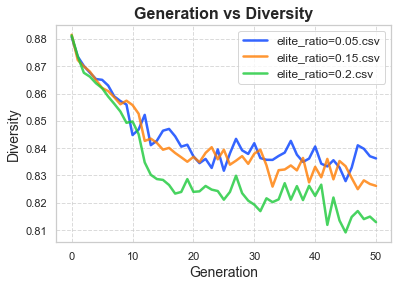

In [6]:
import visualization_suite_1 as vsuite
paths = [
    r"elite_ratio=0.05.csv",
    r"elite_ratio=0.15.csv",
    r"elite_ratio=0.2.csv",
    #r"elite_ratio=0.25.csv"
]
analysis = vsuite.GGMDAnalysis(paths)
diversity = analysis.plot_avg_diversity()

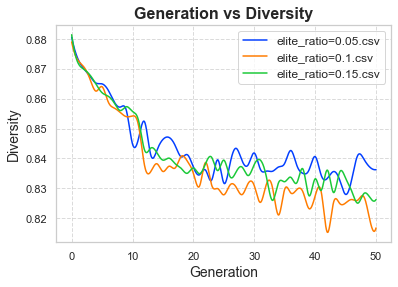

In [3]:
diversity = analysis.plot_avg_diversity(line_plot=False, spline_smoothing=True, )

In [ ]:
reading_error = {
    0.1: 0,
    # 0.2: 0,
    # 0.3: 0,
    # 0.4: 0,
    # 0.5: 0,
}
import csv
bad_configs = []
all_configs = []
error = []
count = 0
for key in reading_error.keys():
    # Assuming 'mutate_prob' needs to match the current 'key' value
    criteria = {"model_path": "/mnt/projects/ATOM/blackst/GMD_workspace/debugging/model.epoch-35"}  # Create a proper dictionary for criteria
    configs, paths = search_configs(root_folder, criteria)  # Assuming search_criteria accepts dictionary as input

    for path, config in zip(paths, configs):
        path = path + r'/data_all_generations.csv'
        raw_like_string = path.replace("\\", "/")
        #print(path)
        all_configs.append(config)
        try:
            df = pd.read_csv(path, quoting=csv.QUOTE_NONE)#, error_bad_lines=False)
        except Exception as e:
            print(f"Error reading {raw_like_string}: {e}")
            error.append(e)
            reading_error[key] += 1  # Use 'key' instead of undefined 'i'
            bad_configs.append(config)
#print(configs)

In [24]:
print(count)

0


In [25]:
print(reading_error)

{0.1: 94}


In [38]:
import yaml

cfs = []
for config_path in bad_configs:
    with open(config_path, 'r') as file:
        config = yaml.safe_load(file)  # Use safe_load to avoid executing any potentially unsafe code
    #rint(type(config))
    config['path'] = config_path.split('\\')[-2]
    print(config)
    cfs.append(config )

{'config': ['/mnt/projects/ATOM/blackst/GMD_workspace/sc24/configs_jtvae_2/5/config254.yaml'], 'elite_ratio': 0.15, 'initial_pop_size': 1000, 'max_clones': 1, 'max_population': 1000, 'model_path': '/mnt/projects/ATOM/blackst/GMD_workspace/debugging/model.epoch-35', 'model_type': 'jtvae', 'mutate_prob': 0.1, 'mutation_std': 0.25, 'num_epochs': 50, 'optima_type': 'maxima', 'optimizer_type': 'geneticoptimizer', 'output_directory': '/mnt/projects/ATOM/blackst/GMD_workspace/sc24/output/JTVAE_logp_2', 'sample_with_replacement': False, 'scorer_type': 'LogPTestCase', 'selection_pool_size': 200, 'selection_type': 'roulette', 'smiles_input_file': '/mnt/projects/ATOM/blackst/GMD_workspace/debugging/all.txt', 'vocab_path': '/mnt/projects/ATOM/blackst/GMD_workspace/debugging/all_vocab.txt', 'path': '009ffe26-58ed-48ff-af7d-eb0a5b52e08d'}
{'config': ['/mnt/projects/ATOM/blackst/GMD_workspace/sc24/configs_jtvae_2/5/config244.yaml'], 'elite_ratio': 0.05, 'initial_pop_size': 1000, 'max_clones': 1, 'max

In [39]:
pd.DataFrame(cfs).to_csv('bad_configs.csv', index=False)

In [40]:
all = pd.read_csv('bad_configs.csv')
all.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 94 entries, 0 to 93
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   config                   94 non-null     object 
 1   elite_ratio              94 non-null     float64
 2   initial_pop_size         94 non-null     int64  
 3   max_clones               94 non-null     int64  
 4   max_population           94 non-null     int64  
 5   model_path               94 non-null     object 
 6   model_type               94 non-null     object 
 7   mutate_prob              94 non-null     float64
 8   mutation_std             94 non-null     float64
 9   num_epochs               94 non-null     int64  
 10  optima_type              94 non-null     object 
 11  optimizer_type           94 non-null     object 
 12  output_directory         94 non-null     object 
 13  sample_with_replacement  94 non-null     bool   
 14  scorer_type              94 

In [85]:
bad = pd.read_csv('bad_configs.csv')
bad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   config                   82 non-null     object 
 1   elite_ratio              82 non-null     float64
 2   initial_pop_size         82 non-null     int64  
 3   max_clones               82 non-null     int64  
 4   max_population           82 non-null     int64  
 5   model_path               82 non-null     object 
 6   model_type               82 non-null     object 
 7   mutate_prob              82 non-null     float64
 8   mutation_std             82 non-null     float64
 9   num_epochs               82 non-null     int64  
 10  optima_type              82 non-null     object 
 11  optimizer_type           82 non-null     object 
 12  output_directory         82 non-null     object 
 13  sample_with_replacement  82 non-null     bool   
 14  scorer_type              82 

In [87]:
for col in all.columns:
    print()
    print()
    print(col)
    print(all[col].value_counts())
    print(bad[col].value_counts())
    print()
    print()



config
['/mnt/projects/ATOM/blackst/GMD_workspace/sc24/configs_jtvae_2/5/config254.yaml']    1
['/mnt/projects/ATOM/blackst/GMD_workspace/sc24/configs_jtvae_2/4/config167.yaml']    1
['/mnt/projects/ATOM/blackst/GMD_workspace/sc24/configs_jtvae_2/2/config101.yaml']    1
['/mnt/projects/ATOM/blackst/GMD_workspace/sc24/configs_jtvae_2/3/config131.yaml']    1
['/mnt/projects/ATOM/blackst/GMD_workspace/sc24/configs_jtvae_2/5/config269.yaml']    1
                                                                                     ..
['/mnt/projects/ATOM/blackst/GMD_workspace/sc24/configs_jtvae_2/3/config153.yaml']    1
['/mnt/projects/ATOM/blackst/GMD_workspace/sc24/configs_jtvae_2/4/config177.yaml']    1
['/mnt/projects/ATOM/blackst/GMD_workspace/sc24/configs_jtvae_2/3/config159.yaml']    1
['/mnt/projects/ATOM/blackst/GMD_workspace/sc24/configs_jtvae_2/4/config171.yaml']    1
['/mnt/projects/ATOM/blackst/GMD_workspace/sc24/configs_jtvae_2/2/config108.yaml']    1
Name: config, Length: 1

In [6]:

file_path = r'C:\Users\Eli Brignac\OneDrive\Desktop\GGMD\visualizations\files_to_compress\2de759cc-259d-4b67-995a-d3138962e229\data_all_generations.csv'
with open(file_path, 'r') as f:
    for i, line in enumerate(f):
        if i > 8545 and i < 8560:  # Read lines around 8551
            print(i, line)


8546  -1.40467358e+00 -9.85993028e-01 -3.77847701e-01 -7.36490607e-01

8547   1.68820411e-01  3.47815841e-01  6.18262887e-01  9.06150043e-02

8548  -1.93276739e+00  8.65394533e-01  1.11079383e+00  4.13539976e-01

8549  -6.68219686e-01  1.36550292e-01 -2.30490065e+00 -2.24390104e-01

8550  -4.89576072e-01  9.45441008e-01  1.15856767e-01  5.68880677e-01

8551   8.93828928e-01  1.37141716e+00 -6.00066662e-01 -3.10211778e-01

8552  -1.11905336e+00 -5.73597193e-01  1.15062237e+00 -1.94242907e+00

8553  -1.11344457e-02  1.14683867e-01  7.99866796e-01  3.90311062e-01

8554  -6.95592940e-01 -6.07997179e-03 -9.33832645e-01 -2.83580780e-01

8555   1.11667037e-01  2.60973597e+00 -5.64728737e-01  5.70881367e-01

8556   9.31811333e-02  9.09388781e-01 -3.00331092e+00  1.13099575e+00

8557   2.55257964e-01  2.97018141e-03 -1.19165756e-01 -7.74037838e-02

8558  -3.05365860e-01  5.03762543e-01  4.28504609e-02 -6.30251914e-02

8559  -2.40338460e-01 -5.61198145e-02 -2.91850686e-01  1.21720821e-01

